In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.ensemble import VotingClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
pd.isnull(df).sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
df.shape

(614, 13)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df = df.drop('Loan_ID',axis=1)

In [11]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [12]:
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

In [15]:
df.nunique()

Gender                 2
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [16]:
# categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [18]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
X = df.drop('Loan_Status',axis=1)
y = df.iloc[:,-1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [28]:
standart_scaler = StandardScaler()
standart_scaler.fit(df)
robust_scaled_data = standart_scaler.transform(df)

In [29]:
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
svm = SVC(probability=True)
svm = svm.fit(X_train,y_train)

In [30]:
bagging_classifier_none = BaggingClassifier(estimator=None, n_estimators=10, random_state=42)
bagging_classifier_none.fit(X_train, y_train)
bagging_classifier_lr = BaggingClassifier(estimator=lr, n_estimators=10, random_state=42)
bagging_classifier_lr.fit(X_train, y_train)
bagging_classifier_svm = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)
bagging_classifier_svm.fit(X_train, y_train)
bagging_classifier_tree = BaggingClassifier(estimator=tree, n_estimators=10, random_state=42)
bagging_classifier_tree.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [31]:
print(f'accuracy of logistic regression {bagging_classifier_lr.score(X_test,y_test)}')
print(f'accuracy with None estimator: {bagging_classifier_none.score(X_test,y_test)}')
print(f'accuracy with Tree: {bagging_classifier_tree.score(X_test,y_test)}')
print(f'accuracy with Svm: {bagging_classifier_svm.score(X_test,y_test)}')


accuracy of logistic regression 0.7831325301204819
accuracy with None estimator: 0.7530120481927711
accuracy with Tree: 0.7530120481927711
accuracy with Svm: 0.6807228915662651


In [32]:
bag_predict = bagging_classifier_none.predict(X_test)

In [33]:
bag_predict

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

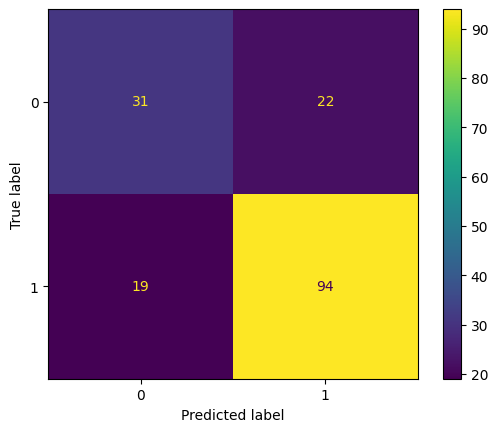

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test,bag_predict)).plot()

Voting

In [35]:
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
svm = SVC(probability=True)
svm = svm.fit(X_train,y_train)

In [36]:
voting_classifier = VotingClassifier(
    estimators=[('lr', lr), ('tree', tree), ('svm', svm)], voting='soft')

In [37]:
voting_classifier

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [38]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [39]:
y_prediction = voting_classifier.predict(X_test)

In [40]:
y_prediction

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
accuracy = accuracy_score(y_test, y_prediction)
print('Voting Accuracy:', accuracy)

Voting Accuracy: 0.7590361445783133


Gradient Boosting Classifier

In [42]:
grad_boost_model = GradientBoostingClassifier()
grad_boost_model.fit(X_train, y_train)
test_y_hat = grad_boost_model.predict(X_test)

In [43]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
print(f'Accuracy with Gradient Boosting Classifier: {clf.score(X_test, y_test)}')

Accuracy with Gradient Boosting Classifier: 0.7831325301204819


In [44]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8834
Test set score: 0.7831


XGBoost

In [45]:
xgboost = GradientBoostingClassifier()
xgboost.fit(X_train, y_train)
test_y_hat = xgboost.predict(X_test)

In [46]:
accuracy=accuracy_score(test_y_hat, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, test_y_hat)))

LightGBM Model accuracy score: 0.7831


In [47]:
print('Training set score: {:.4f}'.format(xgboost.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgboost.score(X_test, y_test)))

Training set score: 0.9223
Test set score: 0.7831


Light GBM

In [48]:
light = lgb.LGBMClassifier()
light.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 265, number of negative: 121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 386, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686528 -> initscore=0.783939
[LightGBM] [Info] Start training from score 0.783939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [49]:
y_pred=light.predict(X_test)

In [50]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7771


In [51]:
print('Training set score: {:.4f}'.format(light.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(light.score(X_test, y_test)))

Training set score: 0.9845
Test set score: 0.7771


In [52]:
lightgbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
    max_depth=1, random_state=0).fit(X_train, y_train)
print(f'Accuracy with Gradient Boosting Classifier: {lightgbm.score(X_test, y_test)}')

Accuracy with Gradient Boosting Classifier: 0.7831325301204819
